In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#df = pd.read_csv(r"C:\Users\jimmy\OneDrive\Documents\Fees 24-25.xlsx", encoding = 'unicode_escape',  on_bad_lines='skip')
df = pd.read_excel(r"C:\Users\jimmy\OneDrive\Desktop\ST115\ST115 Final project\Data\Undergraduate Degree Headcount_1.xlsx")

In [21]:
csv_file = 'Undergraduate_degree_headcount.csv'  # Name your output file
df.to_csv(csv_file, index=False)

In [22]:
new_df = pd.read_csv(r"C:\Users\jimmy\OneDrive\Desktop\ST115\ST115 Final project\Undergraduate_degree_headcount.csv")

In [23]:
new_df.columns.values[0] = 'Undergraduate Degree'
new_df.columns.values[1] = 'Year of Study'
new_df['Year of Study'] = new_df['Year of Study'].fillna("Final Year")
new_df['Undergraduate Degree'] = new_df['Undergraduate Degree'].fillna("")
new_df.loc[94, 'Year of Study'] = 'Subsequent Year'

new_df.loc[[14,82,86,90,128,132,134,138,142,146,150,154,158,162,166,170,174,178,182,186], 'Year of Study'] = 'Total'

new_df['Undergraduate Degree'] = new_df['Undergraduate Degree'].replace(['Final Year','2nd Year','Total','...'], '')


new_df.loc[[14,16,80,82,84,86,88,90,94,126], 'Undergraduate Degree'] = ""
new_df.loc[[16,84,88,130,136,140,144,148,152,156,160,164,168,172,176,180], 'Year of Study'] = "2nd Year"
new_df.loc[126,'Year of Study'] = '3rd Year'



In [24]:
import requests
from bs4 import BeautifulSoup

departments = {}


url = "https://www.lse.ac.uk/study-at-lse/Undergraduate/Prospective-Students/Virtual-undergraduate-open-day/our-departments-and-degree-programmes/our-departments-and-degree-programmes"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml')

accordion = soup.find('div', class_='accordion__content')
h2_tags = accordion.find_all('h2')


        
for tag in accordion.find_all(['h2', 'p']):  # Assuming department names are in <h2> and courses in <p>
    if tag.name == 'h2' and 'accesskey' in tag.find('a').attrs:
        department_name = tag.text.strip()
        current_department = department_name
        departments[department_name] = []  # Initialize the list of courses for this department
    elif tag.name == 'p' and current_department:
        course_name = tag.text.strip()
        departments[current_department].append(course_name) 
       

In [25]:
departments['Department of Anthropology'][1] = ('BA Social Anthropology')
departments['Department of Social Policy'].append('BSc Social Policy and Economics')
departments['Department of Social Policy'].append('BSc Social Policy')
departments['Department of Social Policy'].append('BSc Social Policy and Sociology')
departments['Department of Social Policy'].append('BSc Social Policy with Government')
departments['Department of Anthropology'].append('BSc Social Anthropology')
departments['Department of Statistics'].append('BSc Statistics with Finance')
departments['Department of Statistics'].append('BSc Business Mathematics and Statistics')
departments['Department of Economic History'].append('BSc Economic History with Economics')
departments['Department of Economic History'].append('BSc Economics with Economic History')
departments['Department of Geography and Environment'].append('BSc Environment and Development')
departments['Department of Geography and Environment'].append('BSc Environmental Policy with Economics')
departments['LSE Law School'].append('LLB Laws')
departments['Department of International History'].append('BSc Politics and History')

In [26]:
departments['Department of Statistics'][0] = ('BSc Actuarial Science')

In [27]:
new_df['Undergraduate Degree'] = new_df['Undergraduate Degree'].str.replace(' in ', ' ', regex=False)

In [28]:
degree_to_department = {}
for dept, degrees in departments.items():
    for degree in degrees:
        degree_to_department[degree] = dept

In [29]:
df_totals = new_df[new_df['Year of Study'] == 'Total']
reset = df_totals.reset_index()
just_total = reset.drop(['index','Undergraduate Degree'], axis=1)

In [30]:
undergrad_degree = new_df['Undergraduate Degree'] 
undergrad_degree.replace('', np.nan, inplace=True)
undergrad_degree.replace(r'^\s*$', np.nan, regex=True, inplace=True)
undergrad_degree.dropna(inplace=True)
reset_2 = undergrad_degree.reset_index()
undergrad_degree_drop_index = reset_2.drop('index', axis=1)
filtered_undergrad_degree = undergrad_degree_drop_index.drop(index=[36,49],inplace=False)
filtered_undergrad_degree_df= filtered_undergrad_degree.reset_index()
filtered_undergrad_degree_df = filtered_undergrad_degree_df.drop('index', axis=1)


In [31]:
merged_df = pd.concat([filtered_undergrad_degree_df, just_total], axis=1)

In [32]:
merged_df[['2018/19', '2019/20', '2020/21', '2021/22', '2022/23']] = merged_df[['2018/19', '2019/20', '2020/21', '2021/22', '2022/23']].replace('-', 0)

In [33]:
filtered_merged_df = merged_df.drop('Year of Study',axis=1)
years = ['2018/19', '2019/20', '2020/21', '2021/22', '2022/23']
melted_df = pd.melt(filtered_merged_df, id_vars=['Undergraduate Degree'], value_vars=years, var_name='Year', value_name='Total')
melted_df['Department'] = melted_df['Undergraduate Degree'].map(degree_to_department)

C:\Users\jimmy\AppData\Local\Temp\ipykernel_14104\2592378872.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  department_totals = melted_df.groupby(['Department', 'Year']).sum().reset_index()


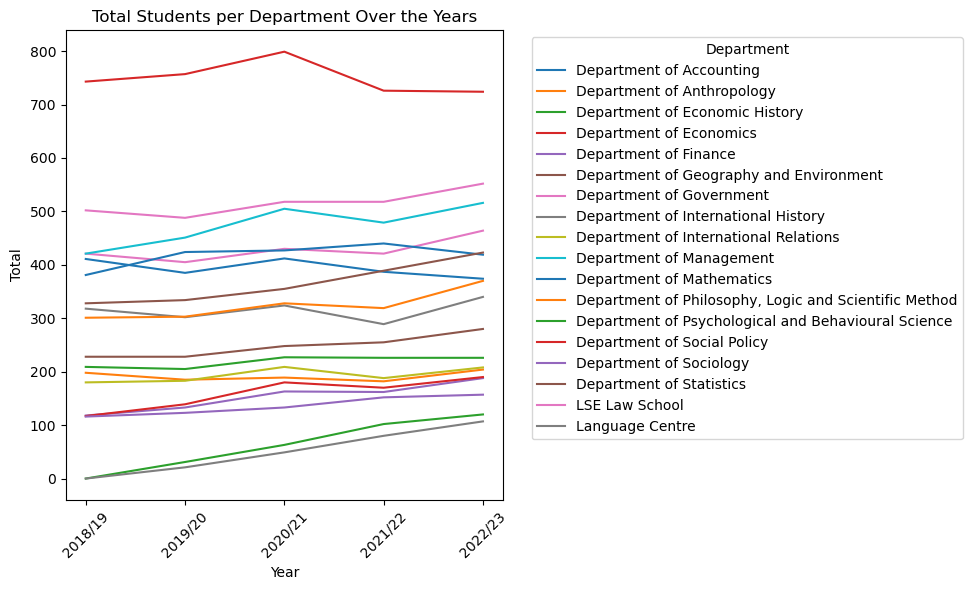

In [34]:
melted_df['Total'] = pd.to_numeric(melted_df['Total'], errors='coerce')


department_totals = melted_df.groupby(['Department', 'Year']).sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 6))

for department, group in department_totals.groupby('Department'):
    ax.plot(group['Year'], group['Total'], label=department)

plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Total Students per Department Over the Years')
plt.xticks(rotation=45)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Top 3 most popular departments: Economics, Management, Law school

In [36]:
salary_df = pd.read_csv(r"C:\Users\jimmy\OneDrive\Desktop\ST115\ST115 Final project\Data\salaries_by_department_2017-19.csv")

In [84]:
salary_by_department_all = salary_df.iloc[9:49]
salary_by_department_all['Median salary'] = salary_by_department_all['Median salary'].fillna(0)
salary_by_department_all = salary_by_department_all.drop(index=10)

C:\Users\jimmy\AppData\Local\Temp\ipykernel_14104\2662508188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_by_department_all['Median salary'] = salary_by_department_all['Median salary'].fillna(0)


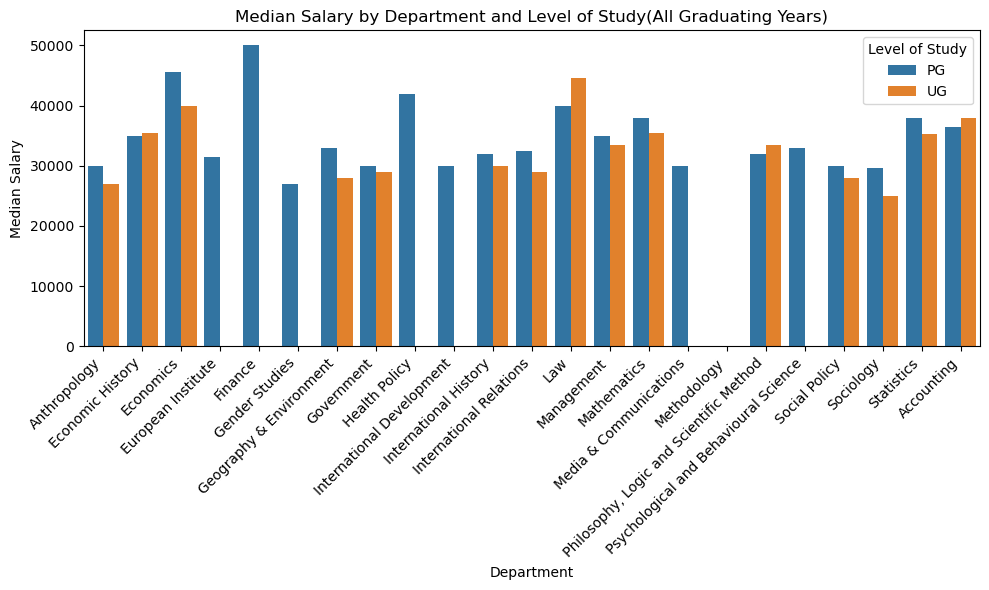

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(data=salary_by_department_all, x='Department', y='Median salary', hue='Level of study')
plt.xlabel('Department')
plt.ylabel('Median Salary')
plt.title('Median Salary by Department and Level of Study(All Graduating Years)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Level of Study')
plt.tight_layout()
plt.show()


In [87]:

salary_by_department_17_18 = salary_df.iloc[49:88]
salary_by_department_17_18['Median salary'] = salary_by_department_17_18['Median salary'].fillna(0)
salary_by_department_17_18 = salary_by_department_17_18.drop(index=81)

C:\Users\jimmy\AppData\Local\Temp\ipykernel_14104\2658948034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_by_department_17_18['Median salary'] = salary_by_department_17_18['Median salary'].fillna(0)


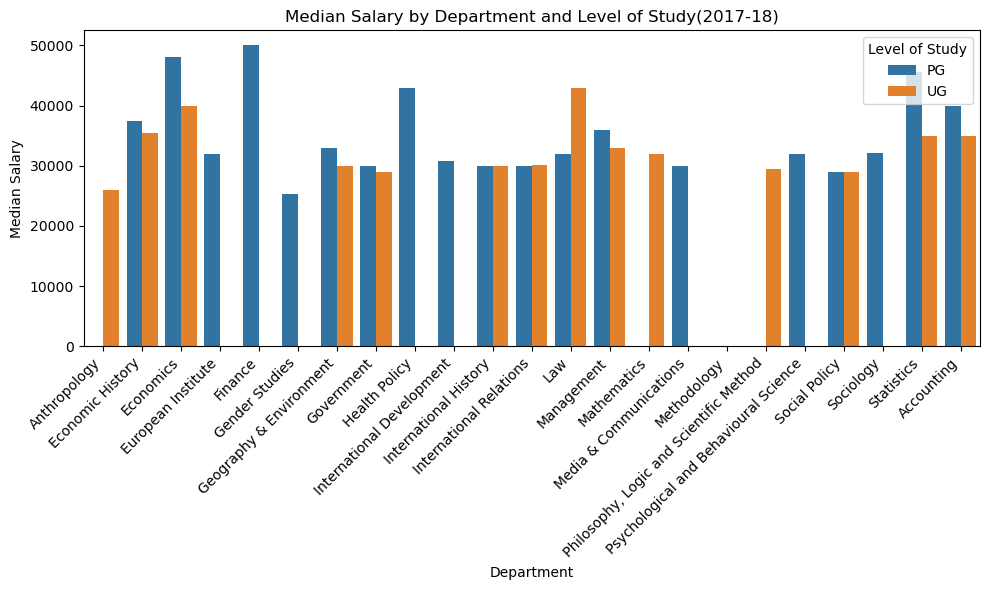

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(data=salary_by_department_17_18, x='Department', y='Median salary', hue='Level of study')
plt.xlabel('Department')
plt.ylabel('Median Salary')
plt.title('Median Salary by Department and Level of Study(2017-18)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Level of Study')
plt.tight_layout()
plt.show()

In [92]:
salary_by_department_18_19 = salary_df.iloc[88:128]
salary_by_department_18_19['Median salary'] = salary_by_department_18_19['Median salary'].fillna(0)
salary_by_department_18_19 = salary_by_department_18_19.drop(index=121)


C:\Users\jimmy\AppData\Local\Temp\ipykernel_14104\2653046408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_by_department_18_19['Median salary'] = salary_by_department_18_19['Median salary'].fillna(0)


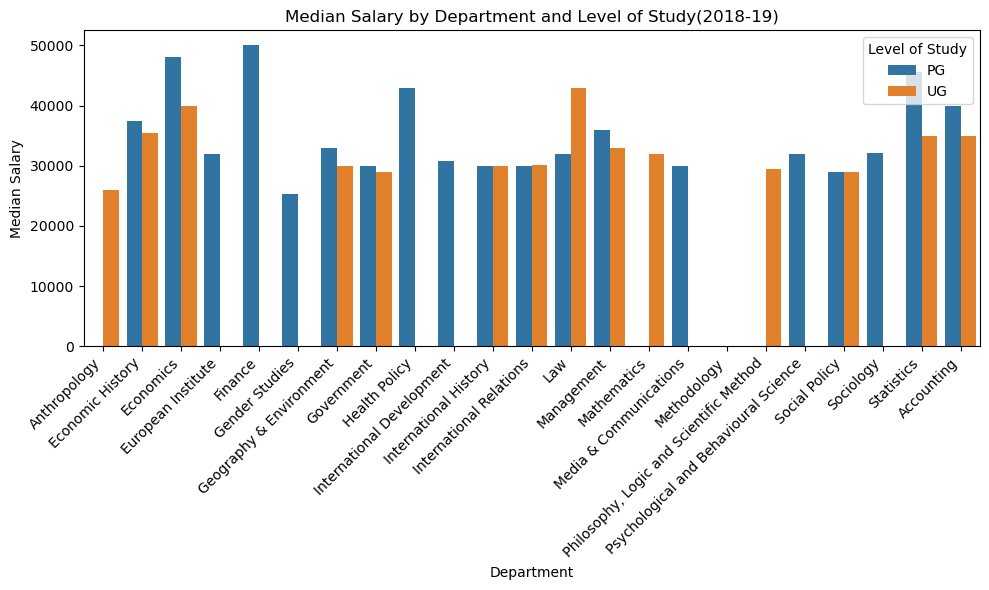

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(data=salary_by_department_17_18, x='Department', y='Median salary', hue='Level of study')
plt.xlabel('Department')
plt.ylabel('Median Salary')
plt.title('Median Salary by Department and Level of Study(2018-19)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Level of Study')
plt.tight_layout()
plt.show()

# Top 3 department starting median salaries
# All graduating year: {